In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [3]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 200), (837, 200), (7895,), (837,))

In [4]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [5]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((7895, 40, 5), (837, 40, 5))

In [6]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))

In [7]:
#shapes
x_train.shape,x_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1))

In [8]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [9]:
#forming model
model=Sequential()

In [10]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [11]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
#training the model
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 9s 58ms/step - loss: 1.9748 - accuracy: 0.3058 - val_loss: 1.6031 - val_accuracy: 0.4791
Epoch 2/30
158/158 [==============================] - 10s 60ms/step - loss: 1.3557 - accuracy: 0.5311 - val_loss: 1.2692 - val_accuracy: 0.5890
Epoch 3/30
158/158 [==============================] - 9s 58ms/step - loss: 1.0747 - accuracy: 0.6366 - val_loss: 1.1901 - val_accuracy: 0.6511
Epoch 4/30
158/158 [==============================] - 8s 51ms/step - loss: 0.9086 - accuracy: 0.6916 - val_loss: 1.1584 - val_accuracy: 0.6189
Epoch 5/30
158/158 [==============================] - 8s 50ms/step - loss: 0.7806 - accuracy: 0.7362 - val_loss: 1.0618 - val_accuracy: 0.6476
Epoch 6/30
158/158 [==============================] - 8s 50ms/step - loss: 0.7059 - accuracy: 0.7662 - val_loss: 1.1244 - val_accuracy: 0.6667
Epoch 7/30
158/158 [==============================] - 8s 53ms/step - loss: 0.6331 - accuracy: 0.7901 - val_loss: 1.0180 - val_accuracy: 0.696

In [13]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

27/27 [==============================] - 0s 8ms/step - loss: 1.2035 - accuracy: 0.7025
[0.07395824790000916, 0.9777073860168457]
[1.2034995555877686, 0.7025089859962463]


In [14]:
import pandas as pd
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
# hist.tail()
print(hist)
print(type(hist))

        loss  accuracy  val_loss  val_accuracy  epoch
0   1.974766  0.305763  1.603146      0.479092      0
1   1.355652  0.531096  1.269217      0.589008      1
2   1.074702  0.636605  1.190107      0.651135      2
3   0.908569  0.691577  1.158386      0.618877      3
4   0.780556  0.736162  1.061792      0.647551      4
5   0.705923  0.766181  1.124439      0.666667      5
6   0.633138  0.790120  1.017970      0.696535      6
7   0.575415  0.812413  0.981827      0.685783      7
8   0.532876  0.824826  1.039200      0.703704      8
9   0.486632  0.842305  1.139180      0.679809      9
10  0.465577  0.843572  1.072610      0.665472     10
11  0.427657  0.857758  1.195615      0.661888     11
12  0.445410  0.855352  1.100330      0.698925     12
13  0.400134  0.875618  1.000165      0.702509     13
14  0.350540  0.882584  1.006548      0.714456     14
15  0.341048  0.888157  1.044217      0.676225     15
16  0.348453  0.882837  0.930683      0.689367     16
17  0.329175  0.894490  1.23

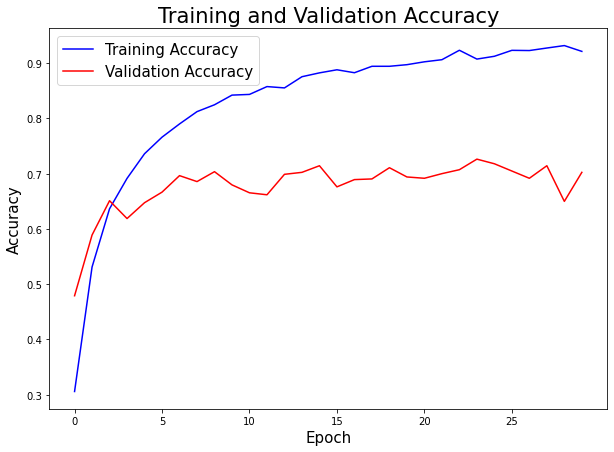

In [15]:
train_acc=hist['accuracy']
val_acc = hist['val_accuracy']

# Set figure size.
plt.figure(figsize=(10, 7))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 21)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks(range(0,30,5), range(0,30,5));


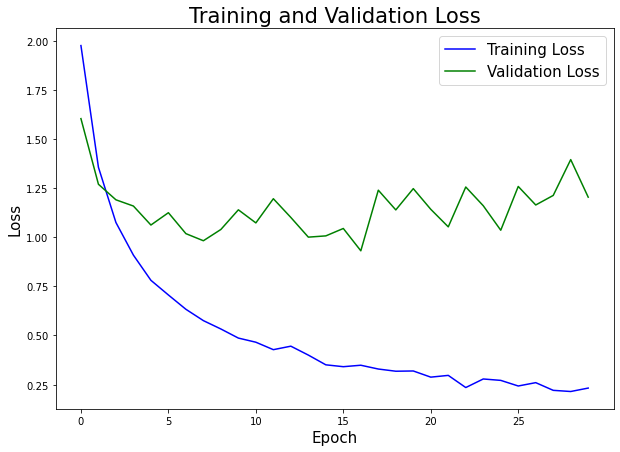

In [16]:

train_loss=hist['loss']
val_loss=hist['val_loss']
plt.figure(figsize=(10, 7))
plt.plot(train_loss, label='Training Loss',color='blue')
plt.plot(val_loss, label='Validation Loss',color='green')
plt.title('Training and Validation Loss', fontsize=21)
plt.xlabel('Epoch',fontsize=15)
plt.legend(fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.xticks(range(0,30,5), range(0,30,5));